# **Data Collection**

## Objectives

* Download data from Kaggle.com and perform an initial EDA.

## Inputs

* unclean_smartwatch_health_data.csv

## Outputs

* ydata-profiling EDA

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Predictive_Analytics_Project/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Predictive_Analytics_Project'

Locate our clean data files

In [4]:
CleanedDataFolder = "inputs/cleaned_data/"
OutputFolder = "outputs/"
HypothesisOneFolder = CleanedDataFolder + "hypothesis_one_data/"
HypothesisTwoFolder = CleanedDataFolder + "hypothesis_two_data/"
HypothesisThreeFolder = CleanedDataFolder + "hypothesis_three_data/"

Load the cleaned data into variables

In [5]:
import pandas as pd
# Hypothesis 1
data = pd.read_csv(HypothesisOneFolder + "cleaned_smartwatch_health_data.csv")
df1 = pd.DataFrame(data)
# Hypothesis 2
TrainSet1 = pd.read_csv(HypothesisTwoFolder + "TestSet.csv")
TestSet1 = pd.read_csv(HypothesisTwoFolder + "TrainSet.csv")
# Hypothesis 3
TrainSet2 = pd.read_csv(HypothesisThreeFolder + "TestSet.csv")
TestSet2 = pd.read_csv(HypothesisThreeFolder + "TrainSet.csv")


# Section 2 Normality, Skewness and Kurtosis Improvement


Lets try improve the datasets numerical variables distriubtions and such

In [6]:
# check min and max for numeric variables to see if boxcox is suitable
for col in df1:
    if df1[col].dtype == "float64" or df1[col].dtype == "int64":
        print(f"{col} min: {df1[col].min()}, max: {df1[col].max()}")

df1.head()

Heart Rate (BPM) min: 40.0, max: 113.99508338123148
Blood Oxygen Level (%) min: 92.7675119453897, max: 100.0
Step Count min: 0.9101380609604088, max: 21144.291453190403
Sleep Duration (hours) min: 2.6394569674224493, max: 10.37828858094464
Stress Level min: 1, max: 11


,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,58.939776,98.809650,5450.390578,7.167236,Highly Active,1
1,75.220601,98.532195,727.601610,6.538239,Highly Active,5
2,113.995083,97.052954,2826.521994,6.503308,Highly Active,5
3,40.000000,96.894213,13797.338044,7.367790,Active,3
4,61.950165,98.583797,15679.067648,6.503308,Highly Active,6


As we dont have any negative values, The BoxCox Transformer seems appropriate to try first.

*** Heart Rate (BPM) ***


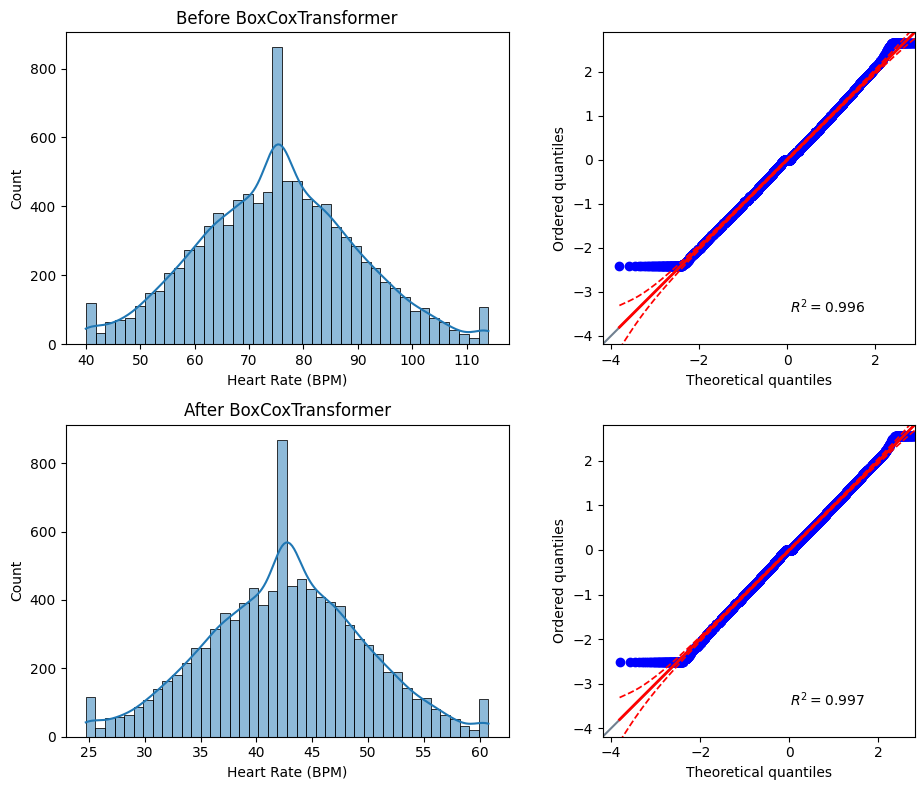

before transformation  | skewness: 0.09 | kurtosis: -0.1
after transformation  | skewness: -0.01 | kurtosis: -0.11


*** Blood Oxygen Level (%) ***


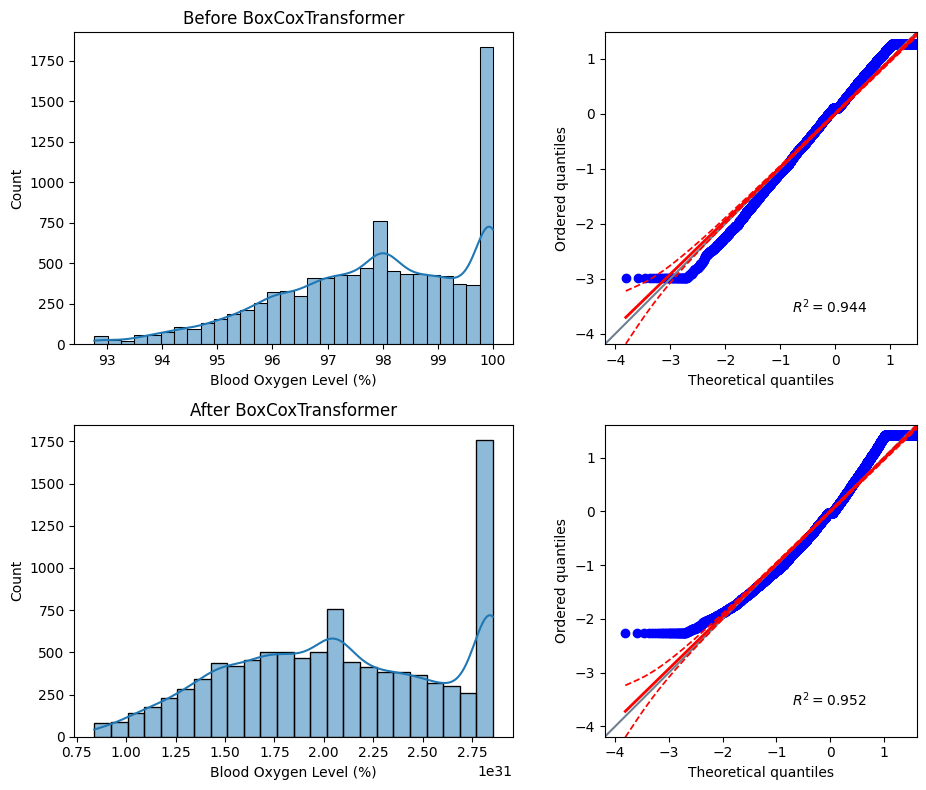

before transformation  | skewness: -0.56 | kurtosis: -0.37
after transformation  | skewness: -0.1 | kurtosis: -1.02


*** Step Count ***


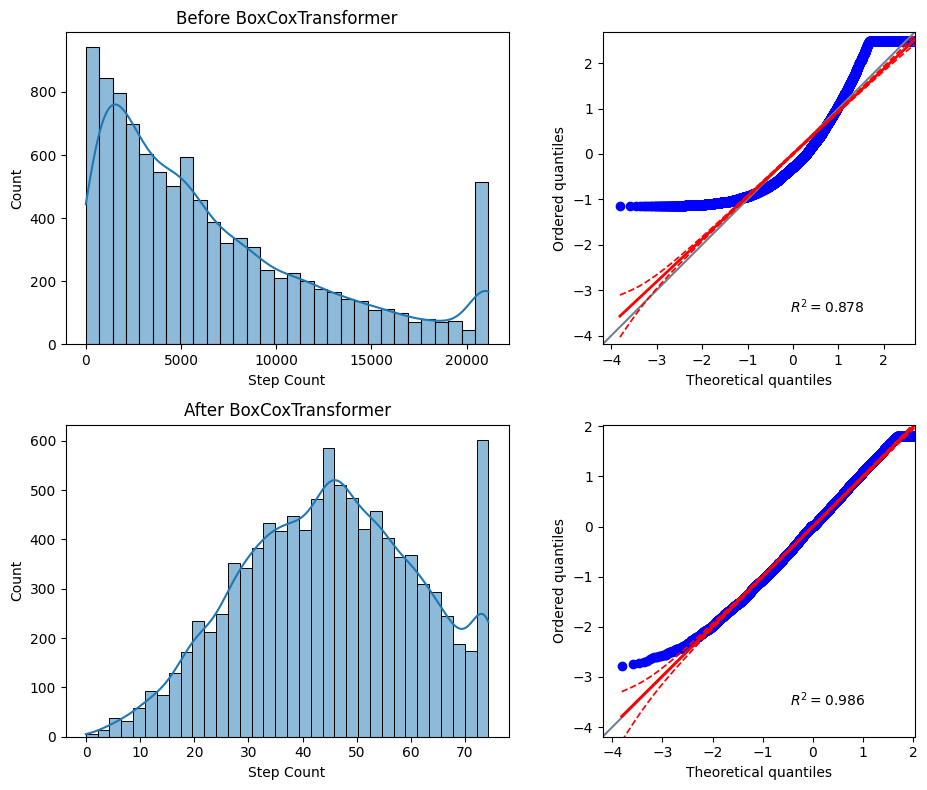

before transformation  | skewness: 1.05 | kurtosis: 0.21
after transformation  | skewness: -0.09 | kurtosis: -0.64


*** Sleep Duration (hours) ***


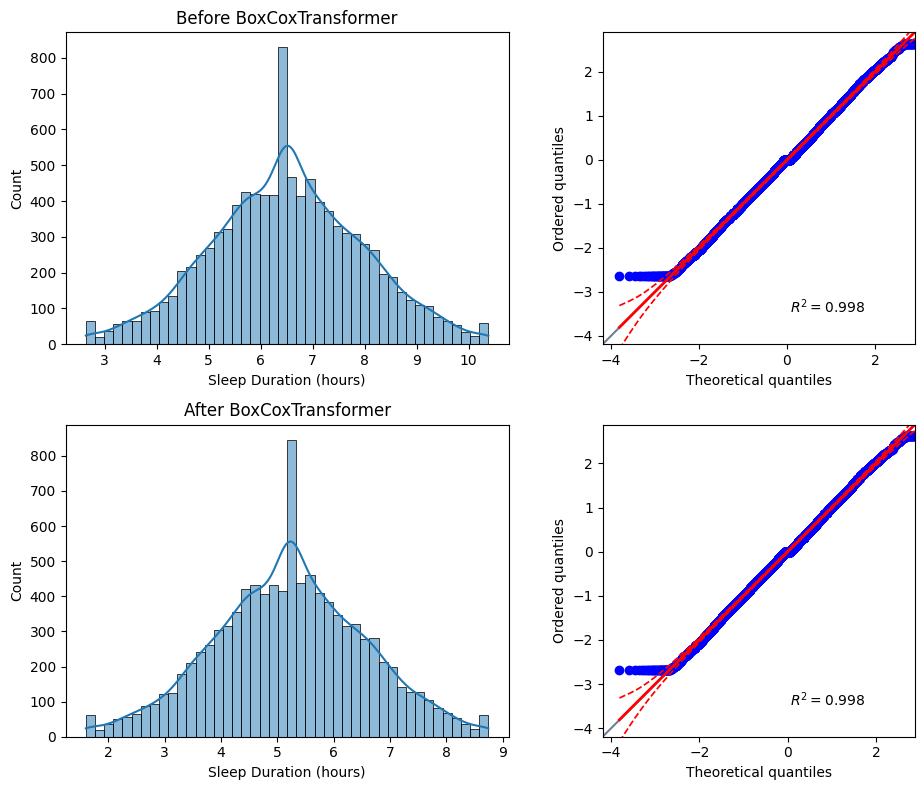

before transformation  | skewness: 0.02 | kurtosis: -0.13
after transformation  | skewness: -0.01 | kurtosis: -0.12


*** Stress Level ***


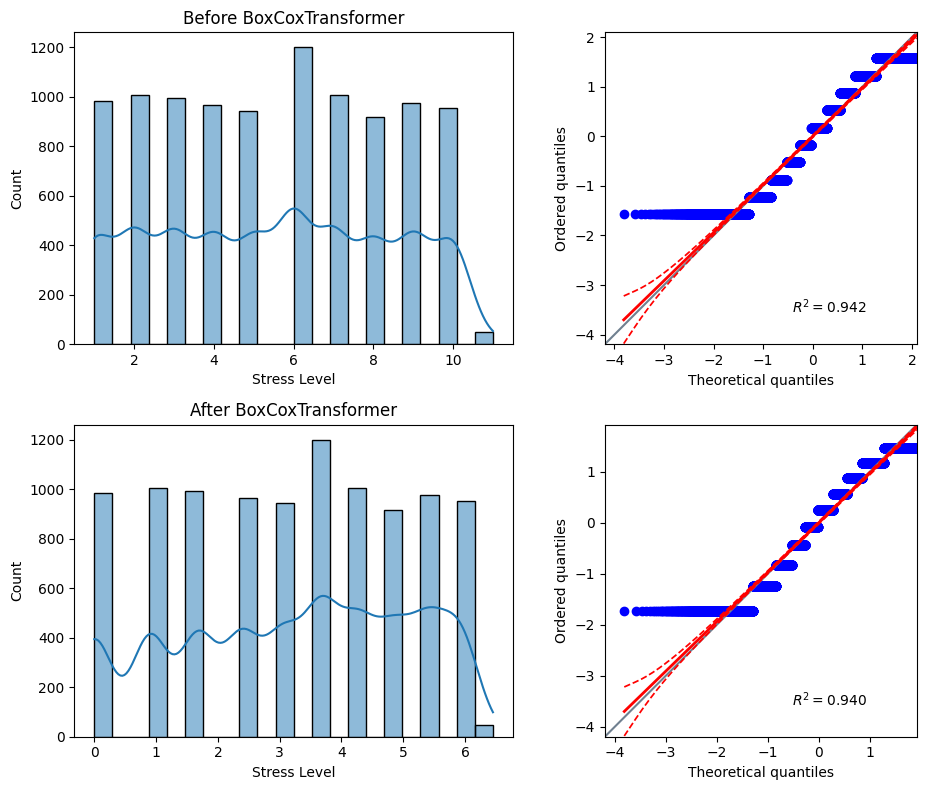

before transformation  | skewness: 0.01 | kurtosis: -1.18
after transformation  | skewness: -0.2 | kurtosis: -1.1




In [ ]:
from sklearn.pipeline import Pipeline
from feature_engine import transformation as vt
from feature_engine.imputation import MeanMedianImputer
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt

df_numeric = df1.select_dtypes(include=['float64','int64'])

def calculate_skew_kurtosis(df,col, moment):
  print(f"{moment}  | skewness: {df[col].skew().round(2)} | kurtosis: {df[col].kurtosis().round(2)}")


pipeline = Pipeline([
      ( 'boxcox', vt.BoxCoxTransformer() ) # Change the transformer here
  ])

df_transformed = pipeline.fit_transform(df_numeric)

def compare_distributions_before_and_after_applying_transformer(df, df_transformed, method):

  for col in df.columns:
    print(f"*** {col} ***")
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

    sns.histplot(data=df, x=col, kde=True, ax=axes[0,0])
    axes[0,0].set_title(f'Before {method}')
    pg.qqplot(df[col], dist='norm',ax=axes[0,1])
    
    sns.histplot(data=df_transformed, x=col, kde=True, ax=axes[1,0])
    axes[1,0].set_title(f'After {method}')
    pg.qqplot(df_transformed[col], dist='norm',ax=axes[1,1])
    
    plt.tight_layout()
    plt.show()
    
    # Save plot
    plot_names = method + "_" + col + ".png"
    # Add a subfolder to the output folder for normality and skewness improvement plots
    NormalitySkewness = os.path.join(OutputFolder, f"norm_skew_improvement/{method}/")
    if not os.path.exists(NormalitySkewness):
        os.makedirs(NormalitySkewness)
    plot_dir = os.path.join(NormalitySkewness, plot_names)
    fig.savefig(plot_dir)
    

    calculate_skew_kurtosis(df,col, moment='before transformation')
    calculate_skew_kurtosis(df_transformed,col, moment='after transformation')
    print("\n")
    
compare_distributions_before_and_after_applying_transformer(df_numeric, df_transformed, method='BoxCoxTransformer')

The results are good from the BoxCox Transformer

Lets try the Log Transformer next

*** Heart Rate (BPM) ***


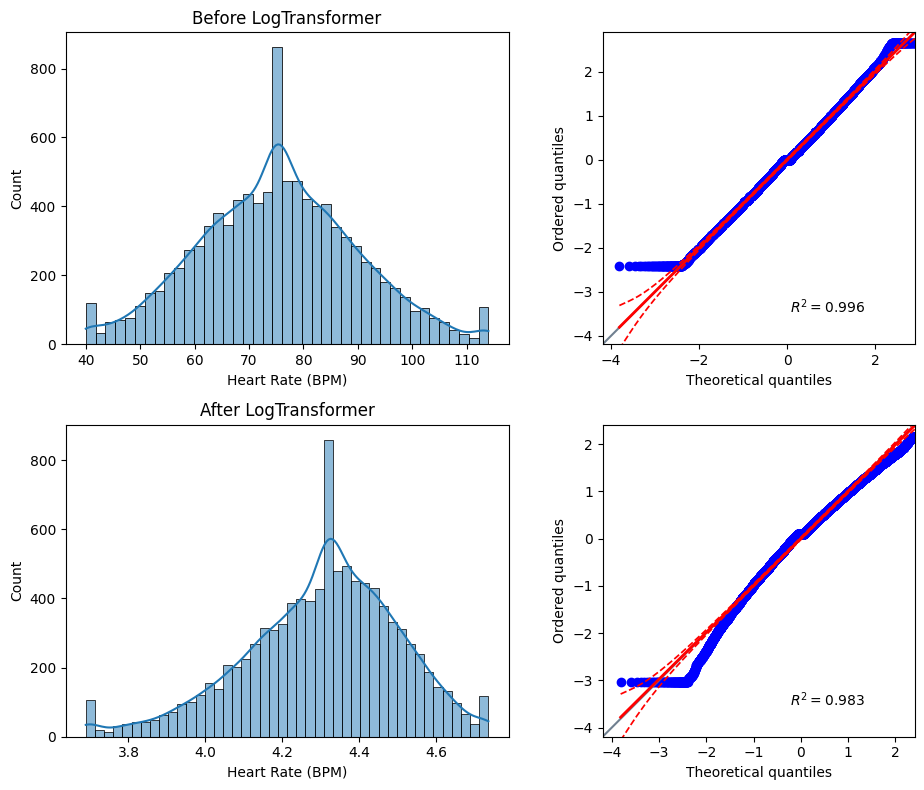

before transformation  | skewness: 0.09 | kurtosis: -0.1
after transformation  | skewness: -0.5 | kurtosis: 0.27


*** Blood Oxygen Level (%) ***


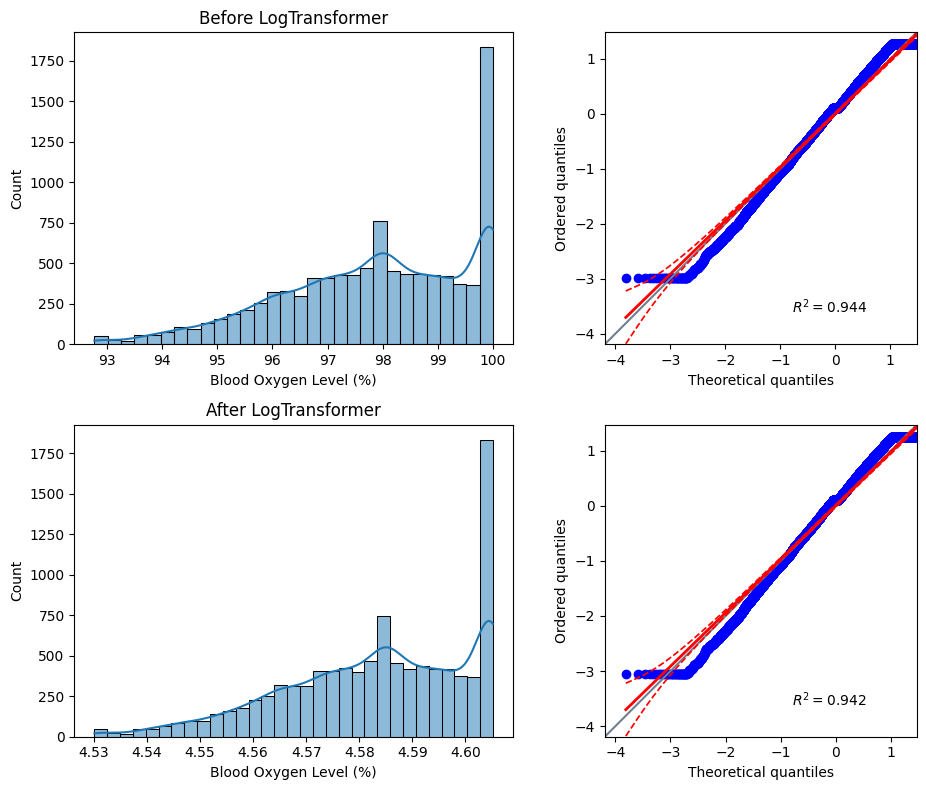

before transformation  | skewness: -0.56 | kurtosis: -0.37
after transformation  | skewness: -0.59 | kurtosis: -0.3


*** Step Count ***


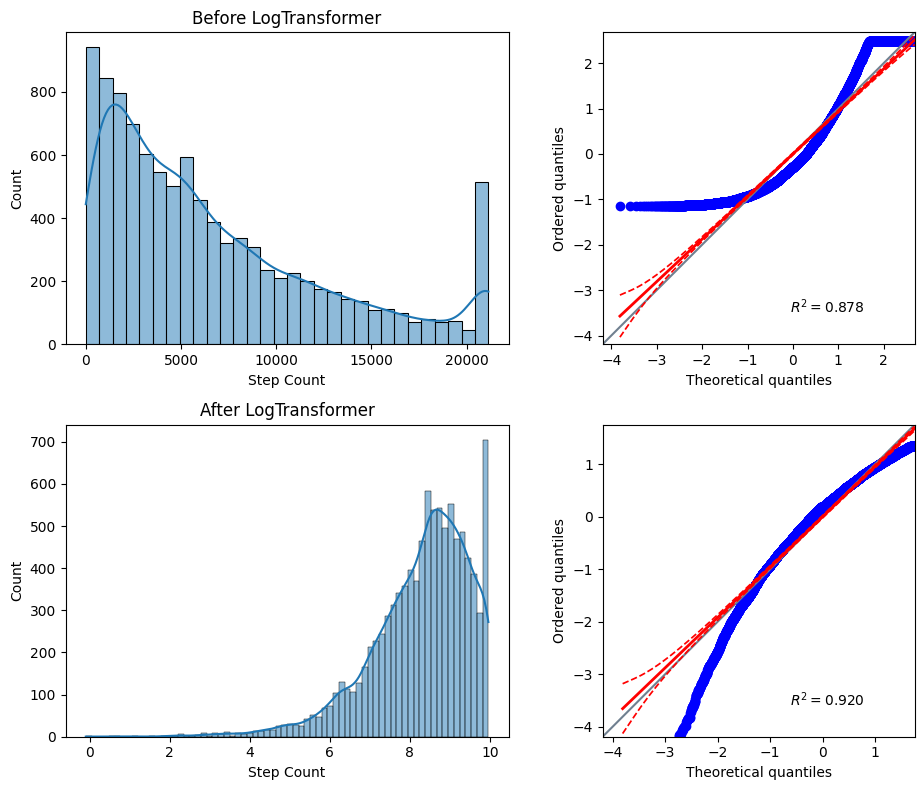

before transformation  | skewness: 1.05 | kurtosis: 0.21
after transformation  | skewness: -1.25 | kurtosis: 2.51


*** Sleep Duration (hours) ***


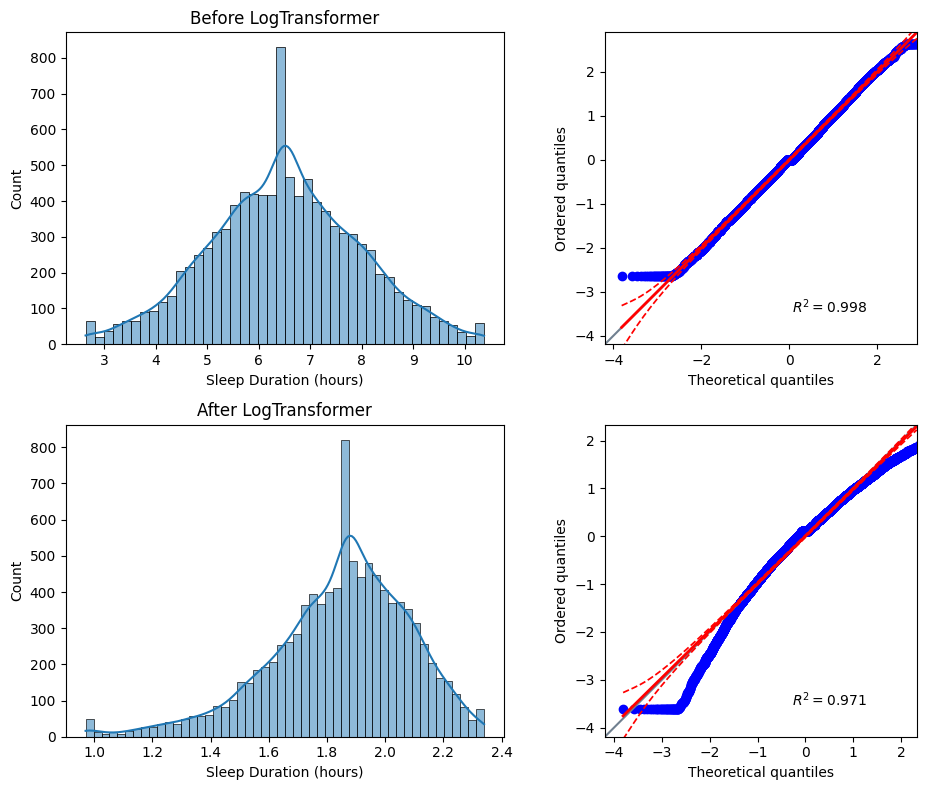

before transformation  | skewness: 0.02 | kurtosis: -0.13
after transformation  | skewness: -0.72 | kurtosis: 0.8


*** Stress Level ***


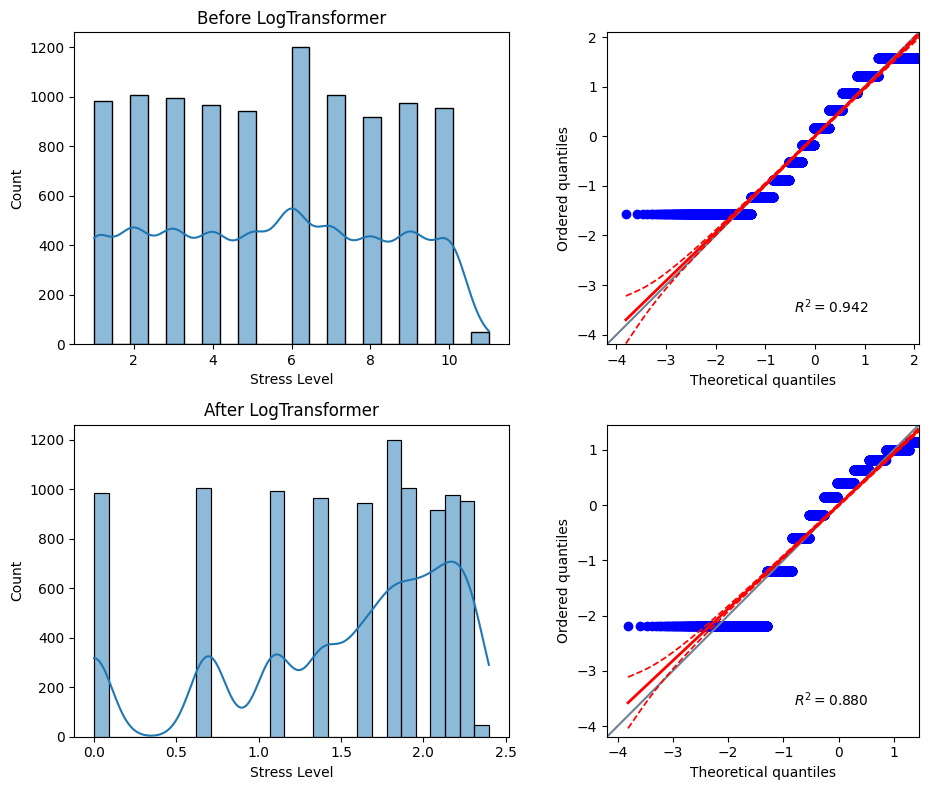

before transformation  | skewness: 0.01 | kurtosis: -1.18
after transformation  | skewness: -0.89 | kurtosis: -0.22




In [8]:
df_numeric = df1.select_dtypes(include=['float64','int64'])

def calculate_skew_kurtosis(df,col, moment):
  print(f"{moment}  | skewness: {df[col].skew().round(2)} | kurtosis: {df[col].kurtosis().round(2)}")


pipeline = Pipeline([
      ( 'log', vt.LogTransformer() ) # Change transformation type here
  ])

df_transformed = pipeline.fit_transform(df_numeric)

def compare_distributions_before_and_after_applying_transformer(df, df_transformed, method):

  for col in df.columns:
    print(f"*** {col} ***")
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

    sns.histplot(data=df, x=col, kde=True, ax=axes[0,0])
    axes[0,0].set_title(f'Before {method}')
    pg.qqplot(df[col], dist='norm',ax=axes[0,1])
    
    sns.histplot(data=df_transformed, x=col, kde=True, ax=axes[1,0])
    axes[1,0].set_title(f'After {method}')
    pg.qqplot(df_transformed[col], dist='norm',ax=axes[1,1])
    
    plt.tight_layout()
    plt.show()
    
    # Save plot
    plot_names = method + "_" + col + ".png"
    # Add a subfolder to the output folder for normality and skewness improvement plots
    NormalitySkewness = os.path.join(OutputFolder, f"norm_skew_improvement/{method}/")
    if not os.path.exists(NormalitySkewness):
        os.makedirs(NormalitySkewness)
    plot_dir = os.path.join(NormalitySkewness, plot_names)
    fig.savefig(plot_dir)
    

    calculate_skew_kurtosis(df,col, moment='before transformation')
    calculate_skew_kurtosis(df_transformed,col, moment='after transformation')
    print("\n")
    
compare_distributions_before_and_after_applying_transformer(df_numeric, df_transformed, method='LogTransformer')

The Log Transformer did not perform as well as the BoxCox

Lets also try the Power Tranformer

*** Heart Rate (BPM) ***


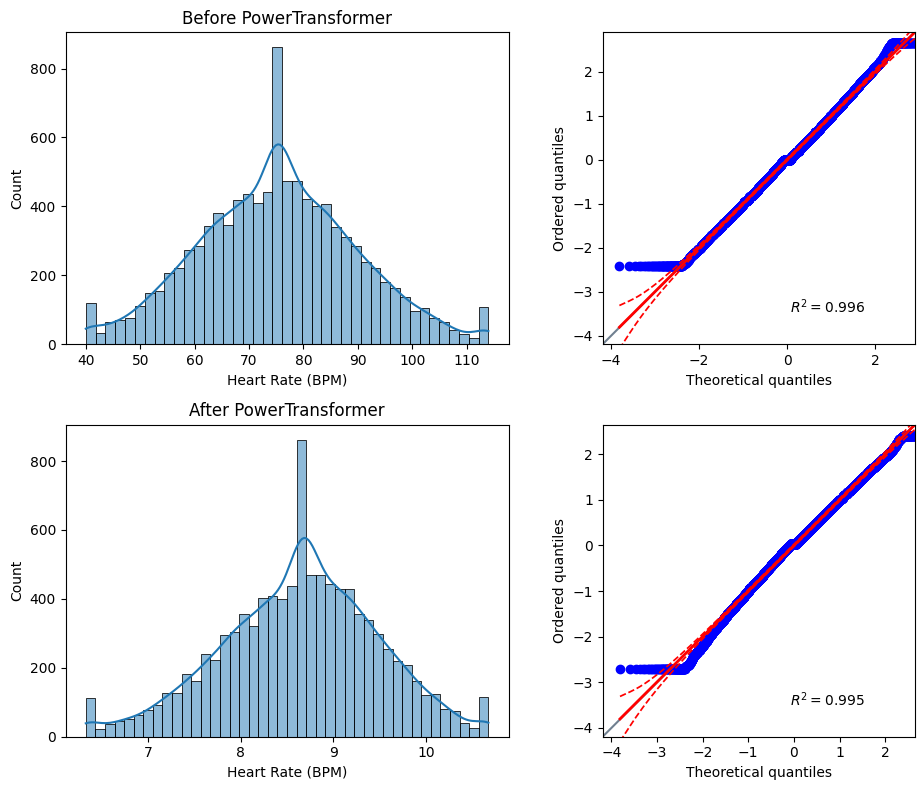

before transformation  | skewness: 0.09 | kurtosis: -0.1
after transformation  | skewness: -0.2 | kurtosis: -0.04


*** Blood Oxygen Level (%) ***


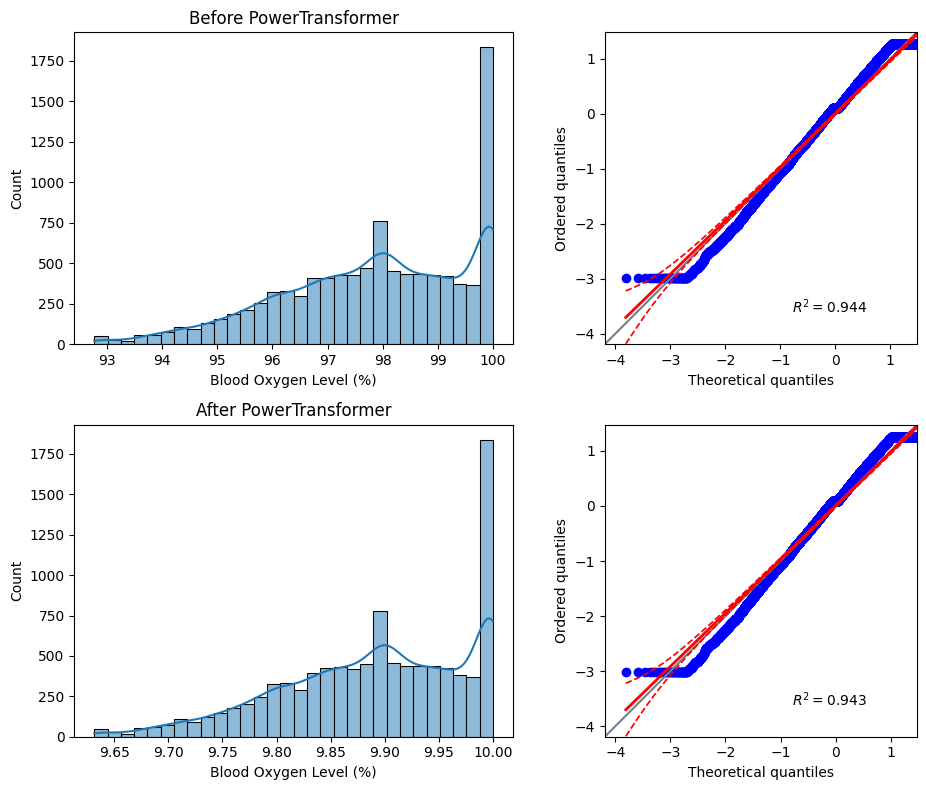

before transformation  | skewness: -0.56 | kurtosis: -0.37
after transformation  | skewness: -0.57 | kurtosis: -0.34


*** Step Count ***


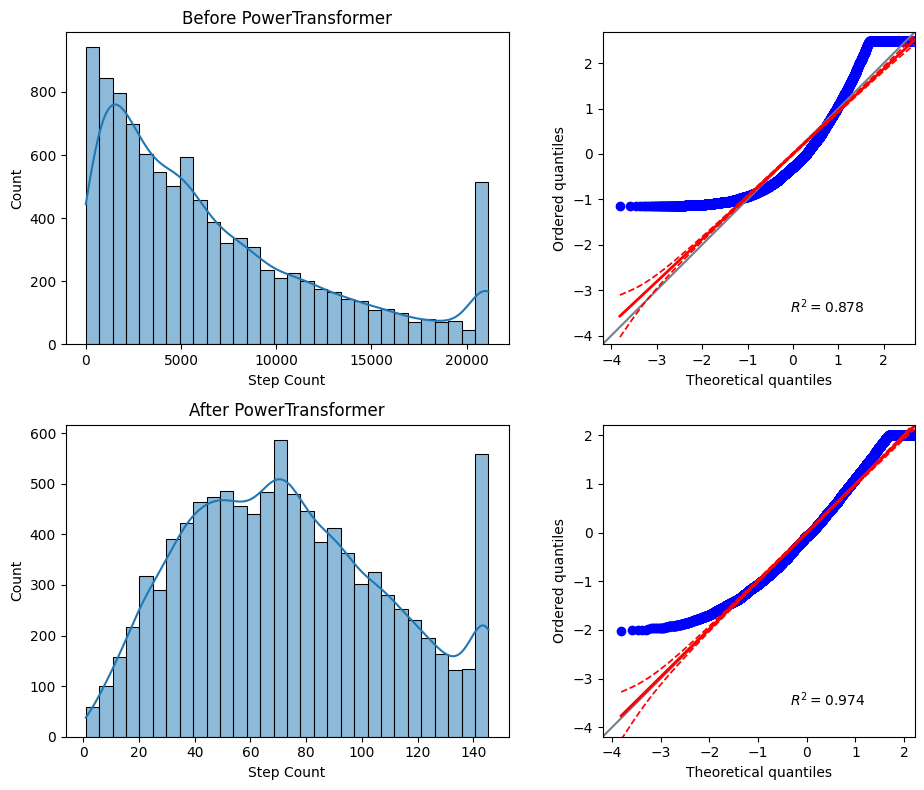

before transformation  | skewness: 1.05 | kurtosis: 0.21
after transformation  | skewness: 0.29 | kurtosis: -0.72


*** Sleep Duration (hours) ***


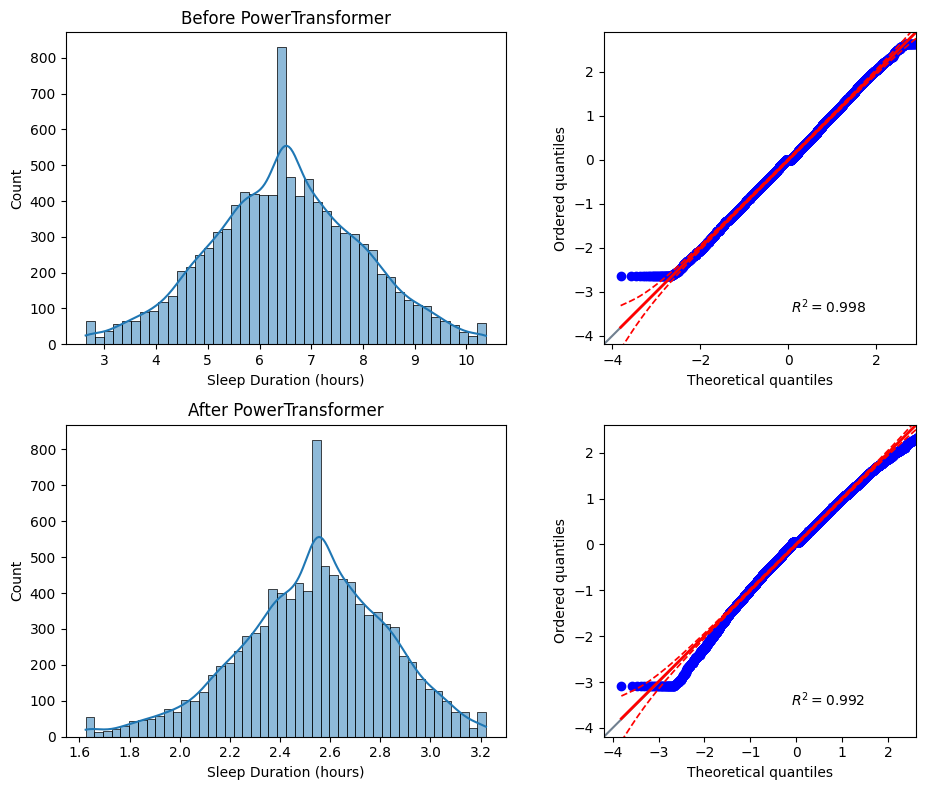

before transformation  | skewness: 0.02 | kurtosis: -0.13
after transformation  | skewness: -0.33 | kurtosis: 0.12


*** Stress Level ***


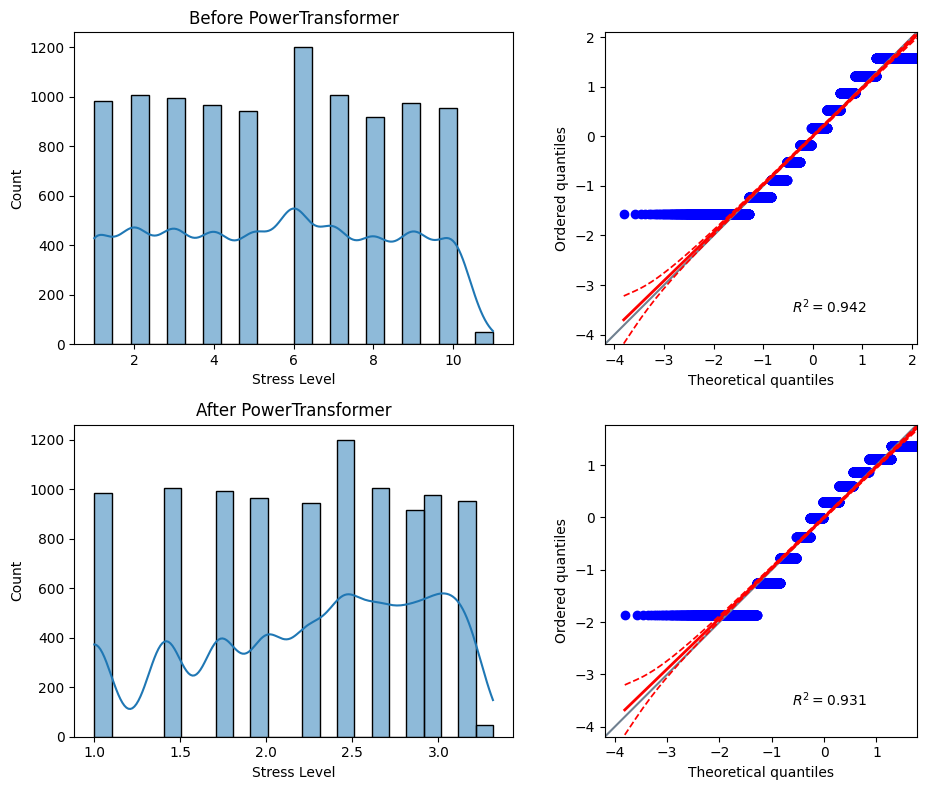

before transformation  | skewness: 0.01 | kurtosis: -1.18
after transformation  | skewness: -0.4 | kurtosis: -0.95




In [ ]:
df_numeric = df1.select_dtypes(include=['float64','int64'])

def calculate_skew_kurtosis(df,col, moment):
  print(f"{moment}  | skewness: {df[col].skew().round(2)} | kurtosis: {df[col].kurtosis().round(2)}")


pipeline = Pipeline([
      ( 'power', vt.PowerTransformer() ) # Change transformation type here
  ])

df_transformed = pipeline.fit_transform(df_numeric)

def compare_distributions_before_and_after_applying_transformer(df, df_transformed, method):

  for col in df.columns:
    print(f"*** {col} ***")
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

    sns.histplot(data=df, x=col, kde=True, ax=axes[0,0])
    axes[0,0].set_title(f'Before {method}')
    pg.qqplot(df[col], dist='norm',ax=axes[0,1])
    
    sns.histplot(data=df_transformed, x=col, kde=True, ax=axes[1,0])
    axes[1,0].set_title(f'After {method}')
    pg.qqplot(df_transformed[col], dist='norm',ax=axes[1,1])
    
    plt.tight_layout()
    plt.show()
    
    # Save plot
    plot_names = method + "_" + col + ".png"
    # Add a subfolder to the output folder for normality and skewness improvement plots
    NormalitySkewness = os.path.join(OutputFolder, f"norm_skew_improvement/{method}/")
    if not os.path.exists(NormalitySkewness):
        os.makedirs(NormalitySkewness)
    plot_dir = os.path.join(NormalitySkewness, plot_names)
    fig.savefig(plot_dir)
    

    calculate_skew_kurtosis(df,col, moment='before transformation')
    calculate_skew_kurtosis(df_transformed,col, moment='after transformation')
    print("\n")
    
compare_distributions_before_and_after_applying_transformer(df_numeric, df_transformed, method='PowerTransformer')

Power Transformer did not perform as well as the Box Cox, we will setlle for the BoxCox transformation.

In [11]:
# Define function to apply boxcox and also return the data back to a dataframe
def apply_boxcox(df):
    pipeline = Pipeline([
      ( 'log', vt.BoxCoxTransformer() ) 
    ])
    df_transformed = pipeline.fit_transform(df)
    df_transformed = pd.DataFrame(df_transformed, columns=df.columns)
    return df_transformed

In [12]:
boxcox = vt.BoxCoxTransformer()
df1_transformed = apply_boxcox(df1.copy())
TestSet1_transformed = apply_boxcox(TestSet1.copy())
TrainSet1_transformed = apply_boxcox(TrainSet1.copy())
TestSet2_transformed = apply_boxcox(TestSet2.copy())
TrainSet2_transformed = apply_boxcox(TrainSet2.copy())

Lets now perform the other transformers we will need for a unsupervised clustering ML task

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
# scaling
from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import OrdinalEncoder 
# pca
from sklearn.decomposition import PCA
# kmeans
from sklearn.cluster import KMeans

def ClusterPipeline():
    pipeline_cluster_base = Pipeline([
        ('encoder', OrdinalEncoder(encoding_method='arbitrary', variables=["Activity Level"])),
        # I have chosen OrdinalEncoder as our categorical variables have an ordinal relationship
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=50, random_state=42)),
        ('kmeans', KMeans(n_clusters=50, random_state=42))
    ])
    return pipeline_cluster_base

pipeline_cluster = ClusterPipeline()

Perform PCA on a copied pipeline to find the best number of components for the parameter

In [22]:
# exclude the last two steps of the pipeline, to determine the optimal number of components first
pipeline_pca = Pipeline(pipeline_cluster.steps[:-2])
df_pca = pipeline_pca.fit_transform(df1_transformed)

n_components = 6 # as 6 columns are present in the dataset
pca = PCA(n_components=n_components).fit(df_pca)
x_PCA = pca.transform(df_pca)

ComponentsList = ["Component " + str(number) for number in range(n_components)]
dfExplVarRatio = pd.DataFrame(
    data= np.round(100 * pca.explained_variance_ratio_ ,3),
    index=ComponentsList,
    columns=['Explained Variance Ratio (%)'])

# print how much the variance is explained by each component
ProcessedData = dfExplVarRatio["Explained Variance Ratio (%)"].sum()

print(f"* The {n_components} components explain {round(ProcessedData, 2)}% of the data \n")
print(dfExplVarRatio)

* The 6 components explain 100.0% of the data 

             Explained Variance Ratio (%)
Component 0                        17.049
Component 1                        16.806
Component 2                        16.734
Component 3                        16.666
Component 4                        16.488
Component 5                        16.256


It seems 6 componenets explains 100% of the data, and lowering those components will lower the explained variance on average about 16.555% everytime a component is further lowered. So i feel we keep components at 6


We update our now researched components for PCA

In [ ]:
def ClusterPipeline():
    pipeline_cluster_base = Pipeline([
        ('encoder', OrdinalEncoder(encoding_method='arbitrary', variables=["Activity Level"])),
        # I have chosen OrdinalEncoder as our categorical variables have an ordinal relationship
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=6, random_state=42)), # 6 components explain 100% of the data
        ('kmeans', KMeans(n_clusters=50, random_state=42))
    ])
    return pipeline_cluster_base

pipeline_cluster = ClusterPipeline()

I must now find the best value for n_clusters by combining an elbow method and silhouette score

In [24]:
pipeline_analysis = Pipeline(pipeline_cluster.steps[:-1])
df_analysis = pipeline_analysis.fit_transform(df1_transformed)

print(df_analysis.shape, '\n', type(df_analysis))

(10000, 6) 
 <class 'numpy.ndarray'>


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

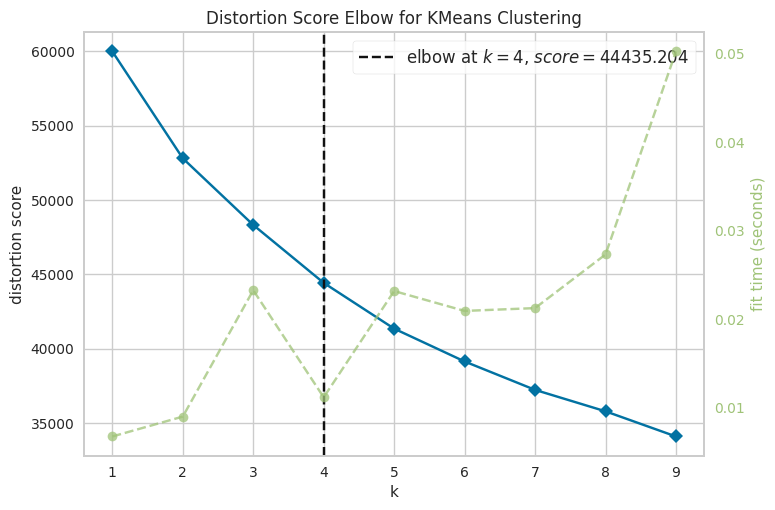

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

viz = KElbowVisualizer(KMeans(random_state=42), k=(1,10))
viz.fit(df_analysis)
viz.show()
plt.show()

The eblow point in the plot we just generated suggests a Kmeans clustering with 4 clusters, and the distortion around this level for the data points looks close/tight enough to respective centroids.

Now we perform a silhouette score to dive a bit more deeply into finding the best number of clusters

=== Average Silhouette Score for different number of clusters ===


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

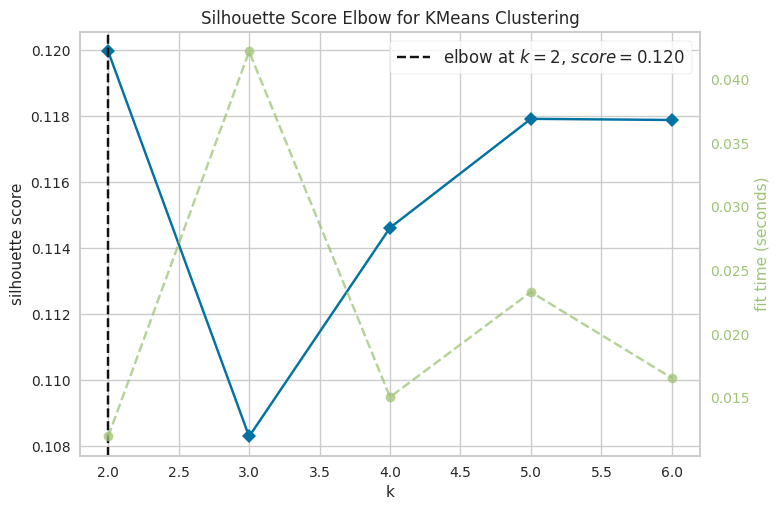



=== Silhouette plot for 2 Clusters ===


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

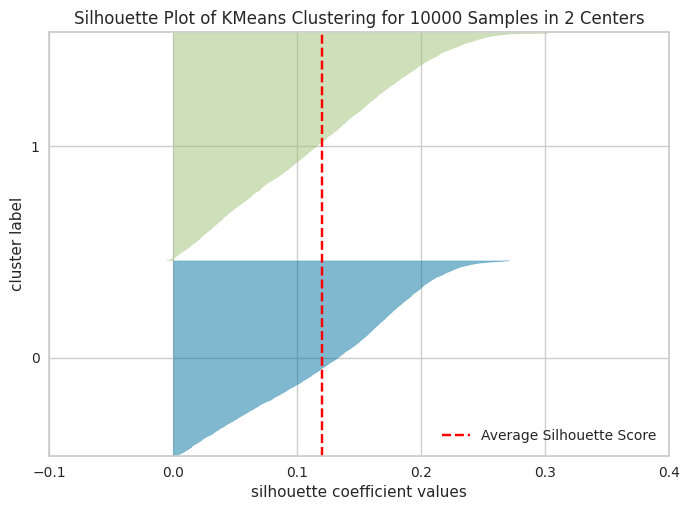



=== Silhouette plot for 3 Clusters ===


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

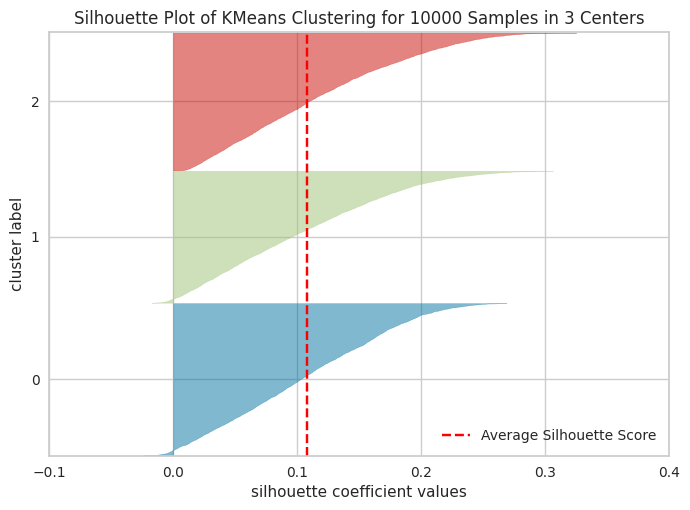



=== Silhouette plot for 4 Clusters ===


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

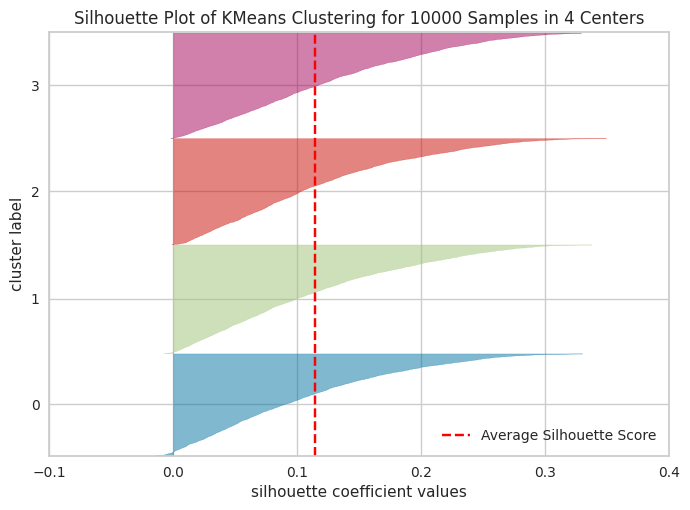



=== Silhouette plot for 5 Clusters ===


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

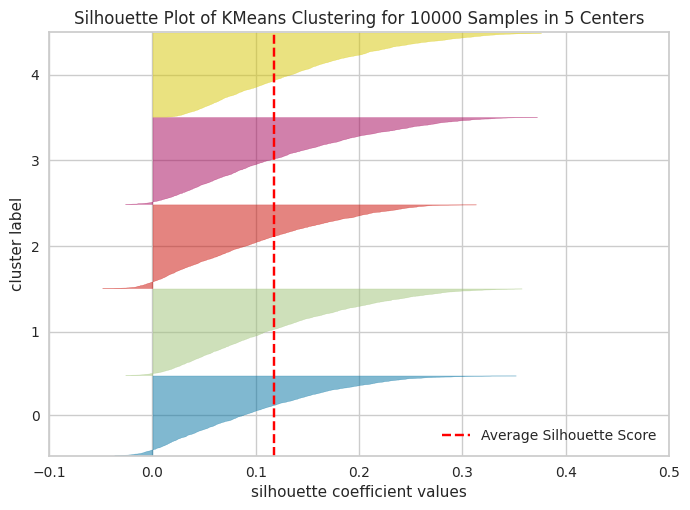



=== Silhouette plot for 6 Clusters ===


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

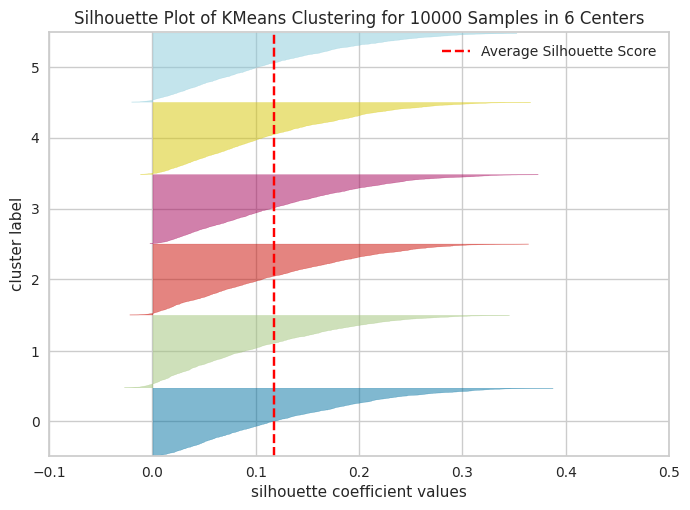



=== Silhouette plot for 7 Clusters ===


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

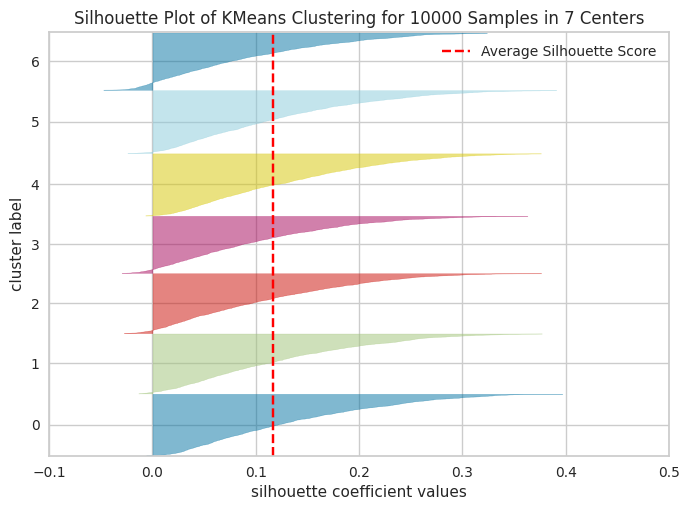



=== Silhouette plot for 8 Clusters ===


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

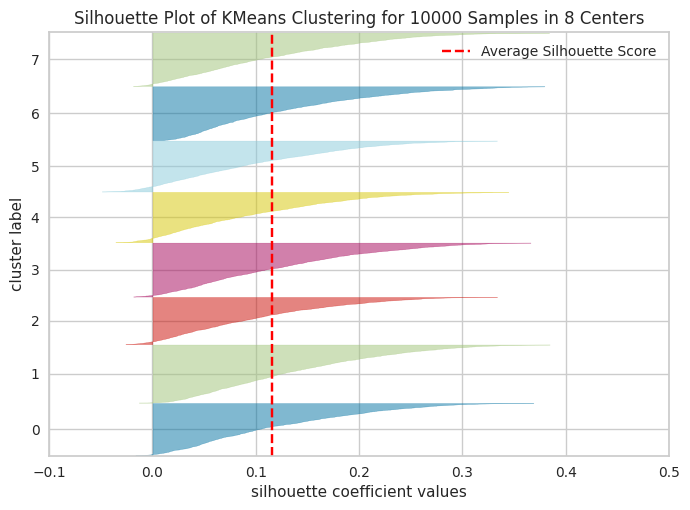



=== Silhouette plot for 9 Clusters ===


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

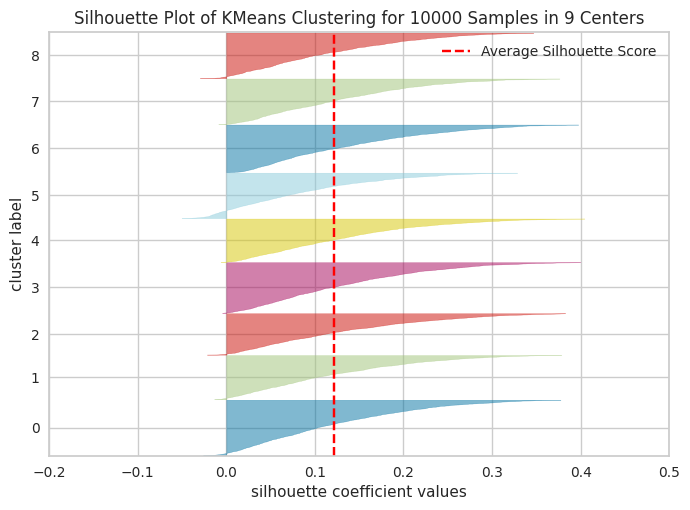



=== Silhouette plot for 10 Clusters ===


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

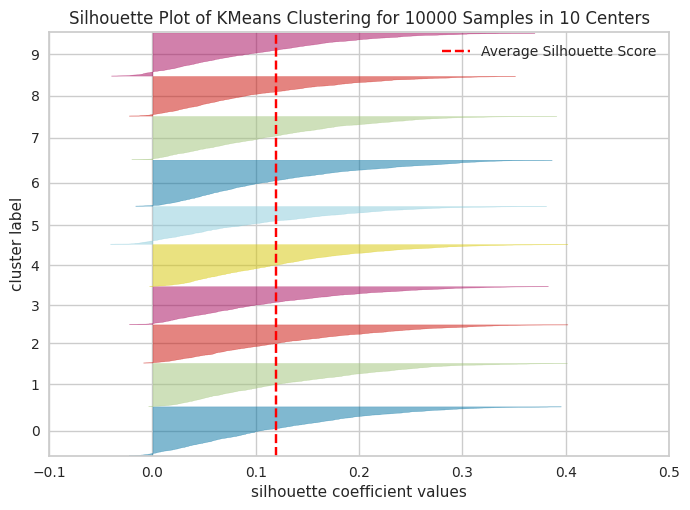

In [29]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

print("=== Average Silhouette Score for different number of clusters ===")
visualizer = KElbowVisualizer(
    KMeans(random_state=42), k=(2, 7), metric='silhouette')
visualizer.fit(df_analysis)
visualizer.show()
plt.show()
print("\n")

for n_clusters in np.arange(start=2, stop=11):

    print(f"=== Silhouette plot for {n_clusters} Clusters ===")
    visualizer = SilhouetteVisualizer(estimator=KMeans(n_clusters=n_clusters, random_state=42),
                                      colors='yellowbrick')
    visualizer.fit(df_analysis)
    visualizer.show()
    plt.show()
    print("\n")

So the first elbow method method performed suggested 4 clusters, the average silhouette score suggested 2 clusters, although i feel that 4 clusters seems optimal from the silhouette plot with 4 centers seems evenly sized with minimal data points that ared under 0.0.

We will try 4 clusters for the first version of this model

In [ ]:
def ClusterPipeline():
    pipeline_cluster_base = Pipeline([
        ('encoder', OrdinalEncoder(encoding_method='arbitrary', variables=["Activity Level"])),
        # I have chosen OrdinalEncoder as our categorical variables have an ordinal relationship
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=6, random_state=42)), # 6 components explain 100% of the data
        ('kmeans', KMeans(n_clusters=4, random_state=42)) #  4 clusters are chosen after the above analysis
    ])
    return pipeline_cluster_base

ClusterPipeline()

We have now done the feature engineering required for our unsupervised clustering task, the next job for this will be to adjust hyperparameters and fit the pipeline to find out our cluster predictions. For now we will feature engineer our correlation task from hypothesis 2 and 3.

---

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
